# MNIST USING CNN

### Nipul Agarwal
### Delhi Technological University
### Engineering Physics

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
dataset=mnist.load_data()

In [3]:
(X_train,y_train),(X_test,y_test)=dataset

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

X_train=X_train/255
X_test=X_test/255

Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [5]:
width=28
height=28
batch_size=256
epochs=20
model=Sequential()
#Conv Layer-1
model.add(Conv2D(6,kernel_size=5,input_shape=(width,height,1),data_format='channels_last',padding='same',activation='relu'))

#Max Pool Layer-1
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Conv Layer-2
model.add(Conv2D(16,kernel_size=5,activation='relu'))

#Max Pool Layer-2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Conv Layer-3
model.add(Conv2D(120,kernel_size=5,activation='relu'))
model.add(Flatten())

#Fully Connected Layer-1
model.add(Dense(84,activation='relu'))

#Softmax
model.add(Dense(10,activation='softmax'))


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.4093 - accuracy: 0.8749 - val_loss: 0.1070 - val_accuracy: 0.9659
Epoch 2/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.0703 - val_accuracy: 0.9774
Epoch 3/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.0519 - val_accuracy: 0.9827
Epoch 4/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.0580 - accuracy: 0.9821 - val_loss: 0.0568 - val_accuracy: 0.9826
Epoch 5/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.0485 - accuracy: 0.9852 - val_loss: 0.0432 - val_accuracy: 0.9851
Epoch 6/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0353 - val_accuracy: 0.9873
Epoch 7/20
60000/60000 [==============================] 

In [9]:
pred=model.evaluate(X_test,Y_test)
print("Score",pred[0])
print("Accuracy",pred[1])

10000/10000 [==============================] - 3s 299us/step
Score 0.037989035464676496
Accuracy 0.989799976348877


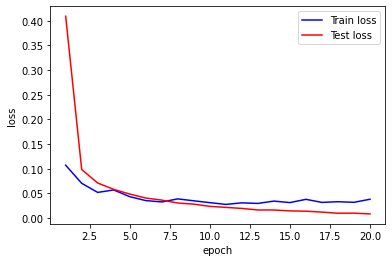

In [10]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,epochs+1))

vy=history.history['val_loss']
ty=history.history['loss']

def plt_dynamic(x,y,y_1,ax,colors=['b']):
    ax.plot(x,y,'b',label='Train loss')
    ax.plot(x,y_1,'r',label='Test loss')
    plt.legend()
    fig.canvas.draw()
plt_dynamic(x,vy,ty,ax)